In [1]:
import pandas as pd
import os
import numpy as np
import requests as r
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#os.getcwd() #download, unzip and converted xml data to csv


In [2]:
#https://data.opendatasoft.com/explore/dataset/objets-trouves-restitution%40datasncf/export/?sort=date&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJhcmVhc3BsaW5lIiwiZnVuYyI6IkNPVU5UIiwiY29sb3IiOiJyYW5nZS1jdXN0b20iLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZX1dLCJ4QXhpcyI6ImRhdGUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiIsInNlcmllc0JyZWFrZG93biI6ImdjX29ib190eXBlX2MiLCJzZXJpZXNCcmVha2Rvd25UaW1lc2NhbGUiOiJtb250aCIsInN0YWNrZWQiOiJub3JtYWwiLCJjb25maWciOnsiZGF0YXNldCI6Im9iamV0cy10cm91dmVzLXJlc3RpdHV0aW9uQGRhdGFzbmNmIiwib3B0aW9ucyI6eyJzb3J0IjoiZGF0ZSJ9fX1dLCJ0aW1lc2NhbGUiOiIiLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D
df=pd.read_excel('/home/ironhackeuse/Ironhack/data-ft-par-labs/Projects/Week-4/objets-trouves-restitution.xlsx')

In [3]:
# Exploring categories : Index(['Date', 'Date et heure de restitution', 'Gare', 'Code UIC'] is my index. 
df.keys()

Index(['Date', 'Date et heure de restitution', 'Gare', 'Code UIC',
       'Nature dobjets', 'Type dobjets', 'Type denregistrement'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717698 entries, 0 to 717697
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          717698 non-null  object 
 1   Date et heure de restitution  215947 non-null  object 
 2   Gare                          717385 non-null  object 
 3   Code UIC                      717385 non-null  float64
 4   Nature dobjets                717698 non-null  object 
 5   Type dobjets                  717698 non-null  object 
 6   Type denregistrement          717698 non-null  object 
dtypes: float64(1), object(6)
memory usage: 38.3+ MB


In [ ]:
#pd.set_option('display.max_columns', None)
 #df.head()

In [ ]:
#df.sample(10)

In [ ]:
# What can we find in the type of register?
#df = df.groupby('Type denregistrement').nunique()
#print(df)
#Only 'Objets trouvé' so no difference if bring by travellers or SNCF employees since 
#for railroader is mandatory it is mandatory to complete a round before finishing their service

In [11]:
df['Year'] = pd.to_datetime(df.Date, utc=True).dt.year
df['Month'] = pd.to_datetime(df.Date, utc=True).dt.month
df['Day'] = pd.to_datetime(df.Date, utc=True).dt.day

In [6]:
pd.pivot_table(data = df, index= 'Gare', columns = 'Year', values = 'Month', aggfunc='count')

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
Gare,,,,,,,,,
Abbeville,NaN,30.0,11.0,8.0,8.0,1.0,NaN,NaN,NaN
Agen,NaN,244.0,362.0,343.0,325.0,266.0,309.0,209.0,50.0
Aix-en-Provence TGV,NaN,360.0,458.0,431.0,439.0,532.0,395.0,204.0,11.0
Aix-les-Bains le Revard,NaN,12.0,24.0,37.0,72.0,44.0,35.0,25.0,9.0
Alençon,NaN,18.0,13.0,4.0,9.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Yvetot,NaN,22.0,29.0,22.0,41.0,NaN,NaN,NaN,NaN
Épinal,NaN,125.0,97.0,88.0,149.0,87.0,109.0,36.0,15.0
Étaples - Le Touquet,NaN,28.0,25.0,16.0,28.0,NaN,NaN,NaN,NaN


In [13]:
obj_per_gare = pd.pivot_table(data = df, index= 'Gare', columns = 'Year', values = 'Month', aggfunc='count')

In [45]:
obj_per_month = pd.pivot_table(data = df, index= 'Month', columns = 'Year', values = 'Gare', aggfunc='count')

In [50]:
obj_per_month[11].sort_values(ascending=False)[:2].plot.bar(figsize=(6,3))


KeyError: 0

In [8]:
obj_per_gare[2020].sort_values(ascending=True)[:3].plot.bar(figsize=(5,2))

NameError: name 'obj_per_gare' is not defined

<AxesSubplot:xlabel='Year'>

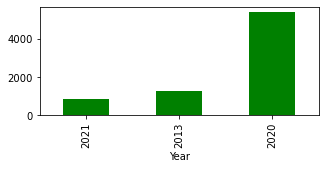

In [51]:
obj_per_gare = pd.pivot_table(data = df, index= 'Year', columns = 'Gare', values = 'Month', aggfunc='count')
obj_per_gare['Paris Montparnasse'].sort_values(ascending=True)[:3].plot.bar(color='green', figsize=(5,2),)

In [ ]:
#df=df.groupby('Gare'). 'Gare'.agg('count');
#plt.plot(df,'bo--')

In [ ]:
#x=df.groupby('Date').Gare.agg('mean');
#plt.plot(x,'bo--')

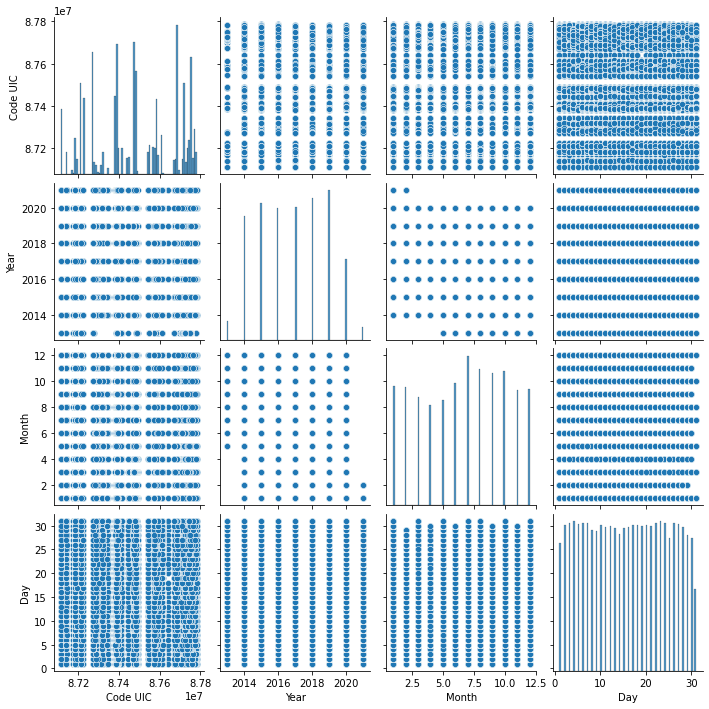

In [16]:
sns.pairplot(df)

In [4]:
loses = pd.pivot_table(data = df, index= 'Year', aggfunc='count')


KeyError: 'Year'

In [5]:
loses['Year'].sort_values(ascending=True)[:3].plot.bar(figsize=(10,5))

NameError: name 'loses' is not defined

In [ ]:
#df = df.groupby('Gare').nunique().count()
#print(df)
#objets_par_gare = df.pivot_table(values=["Gares"], index=['Nature dobjets', 'Type dobjets'"], aggfunc=np.mean)
#print(impute_grps)
#....
##df = sns.load_dataset("objets-trouves-restitution.xlsx")
#sns.pairplot(df)